In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_data(file):
    data = pd.read_csv(file, sep="\t", header=None)
    data.columns= ["MFlops", "Time", "Memory", "Iterations", "N"]
    return data

In [4]:
cpu_1 = get_data("jacobi_cpu_1.txt")
cpu_12 = get_data("jacobi_cpu_12.txt")
cpu_24 = get_data("jacobi_cpu_24.txt")
gpu_seq = get_data("jacobi_gpu_seq.txt")
gpu_naive = get_data("jacobi_gpu_naive.txt")
gpu_multi = get_data("jacobi_gpu_multi.txt")
all_data = [cpu_1, cpu_12, cpu_24, gpu_seq, gpu_naive, gpu_multi]
names = ["1 CPU 1 Thread", "1 CPU 12 Threads", "2 CPU 24 Threads", "GPU sequential", "GPU Naive", "2 GPU"]
markers = ['o', '<', 's', 'P', '*', 'x']

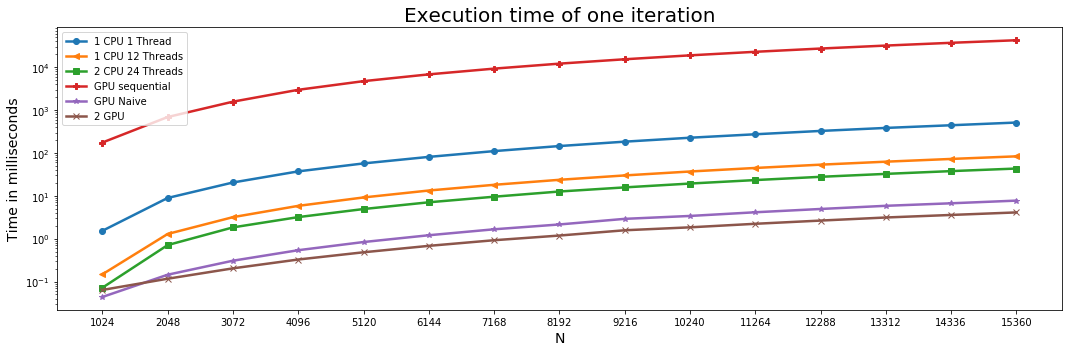

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

for i in range(len(all_data)):
    ax.plot(list(all_data[i]["N"]), list(all_data[i]["Time"]/all_data[i]["Iterations"]*1000), label=names[i], marker=markers[i], linewidth = 2.5)

ax.set_title("Execution time of one iteration", fontsize=20)
ax.set_xlabel("N", fontsize=14)
#ax.set_xlim(left=1)
ax.legend()
ax.set_ylabel("Time in milliseconds", fontsize=14)
ax.set_yscale('log')
#ax.set_xscale('log')


ns = all_data[0]["N"].values
ax.set_xticks(ns)


fig.tight_layout()

plt.savefig("Iteration_time.png", transparent=True)

plt.show()

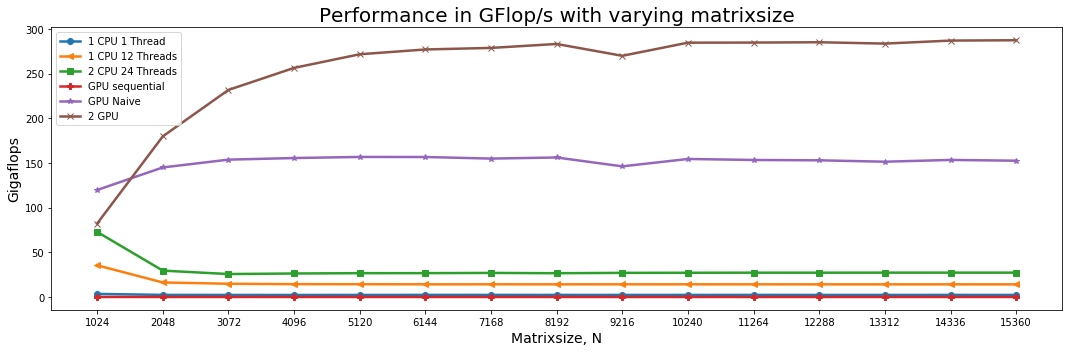

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

for i in range(len(all_data)):
    ax.plot(list(all_data[i]["N"]), list(all_data[i]["MFlops"] / 1000), label=names[i], marker=markers[i], linewidth = 2.5)

ax.set_title("Performance in GFlop/s with varying matrixsize", fontsize=20)
ax.set_xlabel("Matrixsize, N", fontsize=14)
#ax.set_xlim(left=1)
ax.legend()
ax.set_ylabel("Gigaflops", fontsize=14)
#ax.set_yscale('log')
#ax.set_xscale('log')

ns = all_data[0]["N"].values
ax.set_xticks(ns)

fig.tight_layout()

plt.savefig("Giga_flops.png", transparent=True)

plt.show()

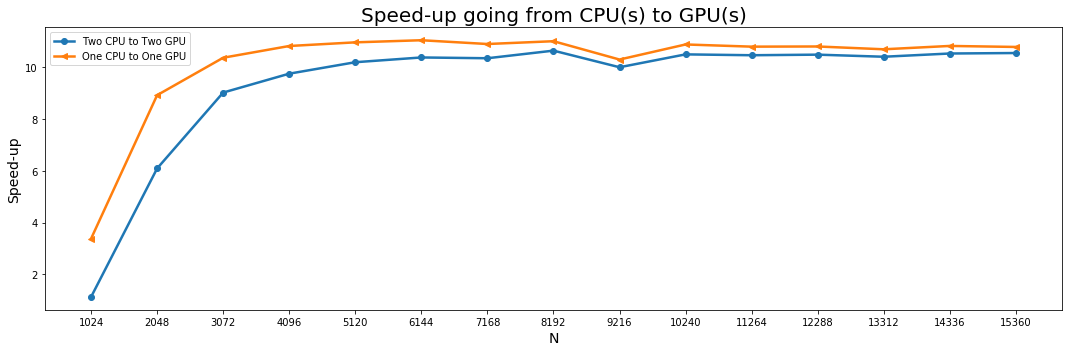

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(list(gpu_multi["N"]), list(gpu_multi["MFlops"] / cpu_24["MFlops"]), label="Two CPU to Two GPU", linewidth=2.5, marker=markers[0])
ax.plot(list(gpu_naive["N"]), list(gpu_naive["MFlops"] / cpu_12["MFlops"]), label="One CPU to One GPU", linewidth=2.5, marker=markers[1])

x_1 = cpu_24["MFlops"]/cpu_12["MFlops"]
x_2 = gpu_multi["MFlops"]/gpu_naive["MFlops"]

#ax.plot(list(gpu_naive["N"]), list(x_1), label="CPU to 2CPUs", linewidth=2.5, marker=markers[3])
#ax.plot(list(gpu_naive["N"]), list(x_2), label="GPU to 2GPUs", linewidth=2.5, marker=markers[4])
#ax.plot(list(gpu_naive["N"]), list(x_2/x_1), label="CPU Speed-up to GPU Speed-up", linewidth=2.5, marker=markers[5])

ns = all_data[0]["N"].values
ax.set_xticks(ns)

ax.set_title("Speed-up going from CPU(s) to GPU(s)", fontsize=20)
ax.set_xlabel("N", fontsize=14)
ax.set_ylabel("Speed-up", fontsize=14)
ax.legend()
fig.tight_layout()

plt.savefig("Speedup.png", transparent=True)
plt.show()